# Multi Linear Regression

### Problem Statement

    - Predicting model for 50 start ups

In [36]:
# Avoid Warnings

import warnings 
warnings.filterwarnings('ignore')

In [37]:
#Loading dataset

import pandas as pd
import numpy as np
startups = pd.read_csv ("~/desktop/Digi 360/Module 7/50_Startups.csv")
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Data Cleansing

In [38]:
startups.shape

(50, 5)

In [39]:
startups.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


### Data Visualization

    Let's try to see if any independent varibale is corrleate with dependent variable or is there any 
    collinearity between independent varibales

In [40]:
# let's import data visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns

#### Visualizing numeric variables

Let's visualize numeric varibales using pairplot

<Figure size 720x432 with 0 Axes>

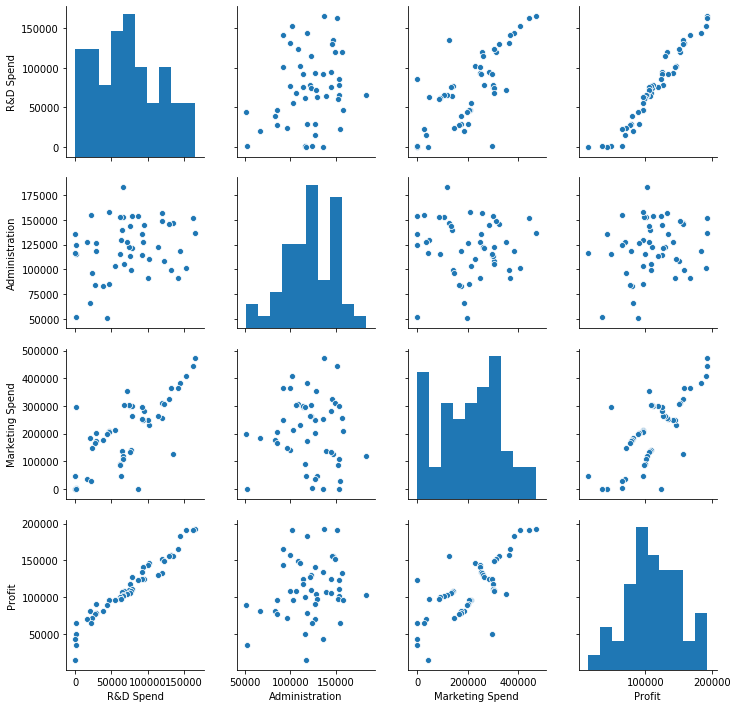

In [41]:
#Let's visulaize the numeric varibles using scatter plot
plt.figure(figsize = (10,6))
sns.pairplot(startups)
plt.show()

#### Visualizing categorical variables

Let's visualize categorical varibales using boxplot

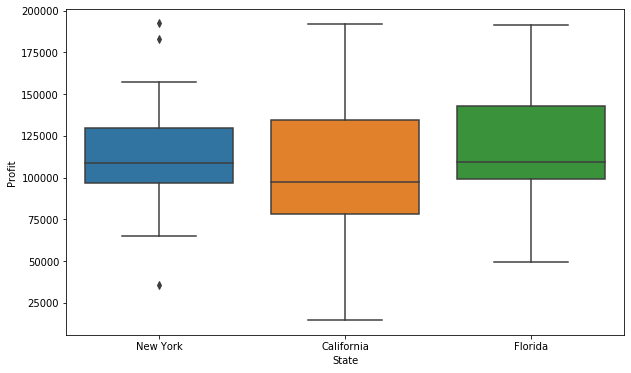

In [42]:
plt.figure(figsize = (10,6))

sns.boxplot(x='State',y='Profit',data=startups)
plt.show()

### Data Preparation

In [43]:
#Creating dummy variables for state since state is categorical variable

startups = pd.get_dummies(startups, columns=['State'])
startups.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [44]:
#Renaming the columns

startups = startups.rename(columns ={'R&D Spend' : 'rd', 'Administration' : 'ad', 'Marketing Spend' :'mk', 'Profit' : 'pf', 
                  'State_California' : 'cf', 'State_Florida' : 'fl', 'State_New York' : 'ny'})
startups.head()

,rd,ad,mk,pf,cf,fl,ny
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


### Splitting into train and test datasets

In [45]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(startups, train_size=0.7,test_size=0.3, random_state=100)
df_train.head()

,rd,ad,mk,pf,cf,fl,ny
25,64664.71,139553.16,137962.62,107404.34,1,0,0
26,75328.87,144135.98,134050.07,105733.54,0,1,0
35,46014.02,85047.44,205517.64,96479.51,0,0,1
17,94657.16,145077.58,282574.31,125370.37,0,0,1
7,130298.13,145530.06,323876.68,155752.60,0,1,0


In [46]:
df_train.describe()

,rd,ad,mk,pf,cf,fl,ny
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,78025.959429,124822.508571,217107.068571,115012.672286,0.314286,0.342857,0.342857
std,43137.808375,25945.934687,121471.889314,38476.690544,0.471008,0.481594,0.481594
min,0.000000,51743.150000,0.000000,35673.410000,0.000000,0.000000,0.000000
25%,53781.225000,109636.640000,136006.345000,97070.320000,0.000000,0.000000,0.000000
50%,75328.870000,127320.380000,249839.440000,108733.990000,0.000000,0.000000,0.000000
75%,108218.345000,147124.505000,304043.995000,137946.435000,1.000000,1.000000,1.000000
max,162597.700000,157693.920000,443898.530000,191792.060000,1.000000,1.000000,1.000000


### Rescale the features

In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#Let's apply MinMaxScaler to the columns except the dummy varibales
num_vars = ['rd', 'ad', 'mk', 'pf']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.describe()

,rd,ad,mk,pf,cf,fl,ny
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,0.479871,0.689748,0.489092,0.508198,0.314286,0.342857,0.342857
std,0.265304,0.244887,0.273648,0.246458,0.471008,0.481594,0.481594
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.330763,0.546419,0.306391,0.393271,0.000000,0.000000,0.000000
50%,0.463284,0.713324,0.562830,0.467981,0.000000,0.000000,0.000000
75%,0.665559,0.900242,0.684940,0.655098,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


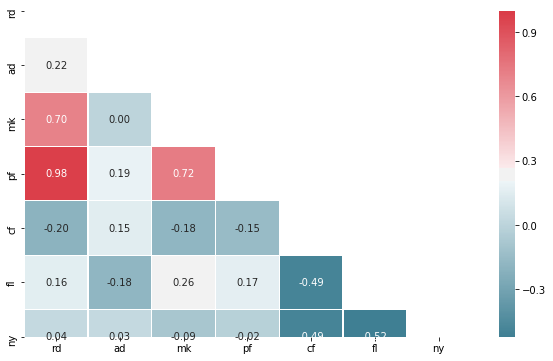

In [48]:
#Let's see the correlation among the varibales now

corr = df_train.corr()
fig, ax = plt.subplots(figsize=(10,6))
colormap = sns.diverging_palette(220,10, as_cmap = True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(corr,cmap = colormap, linewidth=0.2, annot=True,fmt=".2f", mask=dropSelf)

plt.show()

In [49]:
# Dividing into X and y sets for model building

y_train = df_train.pop('pf')
X_train = df_train

### Building the model

In [50]:
import statsmodels.api as sm  

# Adding the constant
X_train_new = sm.add_constant(X_train)
X_train_new.head()

,const,rd,ad,mk,cf,fl,ny
25,1.0,0.397698,0.828781,0.310798,1,0,0
26,1.0,0.463284,0.872035,0.301984,0,1,0
35,1.0,0.282993,0.314337,0.462983,0,0,1
17,1.0,0.582156,0.880923,0.636574,0,0,1
7,1.0,0.801353,0.885193,0.729619,0,1,0


In [51]:
# Running the linear model
lm = sm.OLS(y_train,X_train_new).fit() 

In [52]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                     pf   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     167.1
Date:                Thu, 23 Apr 2020   Prob (F-statistic):           1.87e-20
Time:                        00:07:00   Log-Likelihood:                 59.275
No. Observations:                  35   AIC:                            -106.5
Df Residuals:                      29   BIC:                            -97.22
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0524      0.022      2.398      0.0

### Checking VIF's

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
X_train_new = X_train_new.drop(['const'], axis=1)
X_train_new.columns

Index(['rd', 'ad', 'mk', 'cf', 'fl', 'ny'], dtype='object')

In [55]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,fl,4.95
5,ny,4.87
3,cf,4.77
0,rd,2.20
2,mk,2.11
1,ad,1.16


Let's drop feature `ny` since it has insignificant p value and moderately high VIF.

In [56]:
X = X_train_new.drop('ny', 1,)
X.columns

Index(['rd', 'ad', 'mk', 'cf', 'fl'], dtype='object')

In [57]:
# Rebuilding the model

# Adding a constant
X_train_lm2 = sm.add_constant(X)

# Running the linear model again
lm_2 = sm.OLS(y_train,X_train_lm2).fit() 

print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                     pf   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     167.1
Date:                Thu, 23 Apr 2020   Prob (F-statistic):           1.87e-20
Time:                        00:07:13   Log-Likelihood:                 59.275
No. Observations:                  35   AIC:                            -106.5
Df Residuals:                      29   BIC:                            -97.22
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0543      0.031      1.744      0.0

In [58]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,rd,9.59
2,mk,8.32
1,ad,5.21
4,fl,1.91
3,cf,1.83


Since `ad` feature has insingificant p value and high VIF. Let's remove it. 

In [59]:
X1 = X.drop('ad', 1,)
X1.columns

Index(['rd', 'mk', 'cf', 'fl'], dtype='object')

In [60]:
# Rebuilding model

# Adding a constant
X_train_lm3 = sm.add_constant(X1)

# Running the linear model again
lm_3 = sm.OLS(y_train,X_train_lm3).fit() 

print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                     pf   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     214.1
Date:                Thu, 23 Apr 2020   Prob (F-statistic):           1.36e-21
Time:                        00:08:34   Log-Likelihood:                 59.115
No. Observations:                  35   AIC:                            -108.2
Df Residuals:                      30   BIC:                            -100.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0429      0.022      1.986      0.0

In [61]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,mk,8.31
0,rd,7.45
3,fl,1.85
2,cf,1.40


Let's remove feature `fl` since it has high p value

In [63]:
X2 = X1.drop('fl', 1,)
X2.columns

Index(['rd', 'mk', 'cf'], dtype='object')

In [65]:
# Rebuilding model

# Adding a constant
X_train_lm4 = sm.add_constant(X2)

# Running the linear model again
lm_4 = sm.OLS(y_train,X_train_lm4).fit() 

print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                     pf   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     290.1
Date:                Thu, 23 Apr 2020   Prob (F-statistic):           9.25e-23
Time:                        00:11:21   Log-Likelihood:                 58.837
No. Observations:                  35   AIC:                            -109.7
Df Residuals:                      31   BIC:                            -103.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0480      0.020      2.392      0.0

In [66]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X2.columns
vif['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,mk,7.48
0,rd,7.44
2,cf,1.22


Let's remove `cf` since it has high p value

In [67]:
X3 = X2.drop('cf', 1,)
X3.columns

Index(['rd', 'mk'], dtype='object')

In [68]:
# Rebuilding model

# Adding a constant
X_train_lm5 = sm.add_constant(X3)

# Running the linear model again
lm_5 = sm.OLS(y_train,X_train_lm5).fit() 

print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                     pf   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     419.5
Date:                Thu, 23 Apr 2020   Prob (F-statistic):           1.10e-23
Time:                        00:14:05   Log-Likelihood:                 57.683
No. Observations:                  35   AIC:                            -109.4
Df Residuals:                      32   BIC:                            -104.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0611      0.018      3.346      0.0

In [69]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X3.columns
vif['VIF'] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,rd,7.4
1,mk,7.4


In [70]:
X4 = X3.drop('mk', 1,)
X4.columns

Index(['rd'], dtype='object')

In [71]:
# Rebuilding model

# Adding a constant
X_train_lm6 = sm.add_constant(X4)

# Running the linear model again
lm_6 = sm.OLS(y_train,X_train_lm6).fit() 

print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                     pf   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     792.2
Date:                Thu, 23 Apr 2020   Prob (F-statistic):           1.20e-24
Time:                        00:53:15   Log-Likelihood:                 56.199
No. Observations:                  35   AIC:                            -108.4
Df Residuals:                      33   BIC:                            -105.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0714      0.018      4.041      0.0

### Residual analysis for the training data

In [72]:
X_train_lm6.shape

(35, 2)

In [73]:
y_train_profit = lm_6.predict(X_train_lm6)

In [74]:
y_train_profit.head()

25    0.433404
26    0.493101
35    0.329000
17    0.601298
7     0.800811
dtype: float64

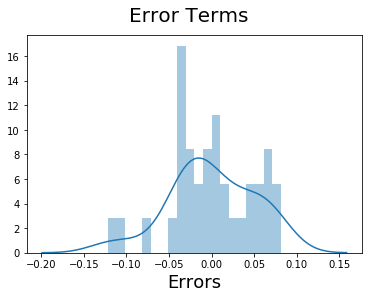

In [75]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_profit), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)  
plt.show()

### Making Predictions using final model

In [76]:
# Apply scaling on test set

num_vars = ['rd', 'ad', 'mk', 'pf']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_test.describe()

,rd,ad,mk,pf,cf,fl,ny
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.385113,0.471569,0.414850,0.508677,0.400000,0.266667,0.333333
std,0.314306,0.242145,0.270871,0.252822,0.507093,0.457738,0.487950
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.132660,0.355650,0.257573,0.347349,0.000000,0.000000,0.000000
50%,0.335617,0.478772,0.415266,0.462312,0.000000,0.000000,0.000000
75%,0.581863,0.578066,0.575526,0.673395,1.000000,0.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
y_test = df_test.pop('pf')
X_test = df_test

In [78]:
# Creating X_test_lm6 dataframe by dropping variables from X_test_lm6

X_test_lm6 = X_test[X4.columns]
X_test_lm6.head()

,rd
6,0.814128
36,0.173353
37,0.266527
28,0.399467
43,0.093776


In [79]:
# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test_lm6)

In [80]:
X_test_lm6.head()

,const,rd
6,1.0,0.814128
36,1.0,0.173353
37,1.0,0.266527
28,1.0,0.399467
43,1.0,0.093776


In [81]:
# Making predictions using the final model

y_pred_lm6 = lm_6.predict(X_test_lm6)
y_pred_lm6.head()

6     0.812440
36    0.229205
37    0.314012
28    0.435014
43    0.156774
dtype: float64

### Finding R^2 for the test

In [82]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_lm6)

0.7689526185280667

### Model Evoluation

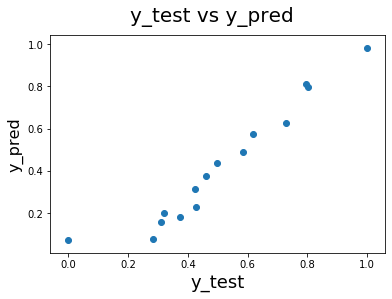

In [84]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_lm6)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   
plt.show()



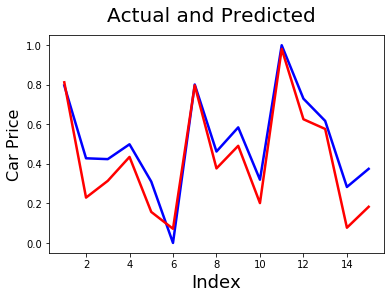

In [87]:
# Actual vs Predicted
x = [i for i in range(1,16,1)]
fig = plt.figure()
plt.plot(x,y_test, color="blue", linewidth=2.5, linestyle="-")  
plt.plot(x,y_pred_lm6, color="red",  linewidth=2.5, linestyle="-")  
fig.suptitle('Actual and Predicted', fontsize=20)              
plt.xlabel('Index', fontsize=18)                              
plt.ylabel('Car Price', fontsize=16)   
plt.show()

### Finding RMSE

In [94]:
#Prediction on train data
y_train_pred = lm_6.predict(X_train_lm6)

In [95]:
#Finding train Risedual values
train_resid = y_train_pred - y_train

In [96]:
#rmse value for train data
train_rmse = np.sqrt (np.mean(train_resid * train_resid))
train_rmse

0.0485756931612029

In [92]:
#Finding test Risedual values
test_resid = y_pred_lm6 - y_test

In [93]:
#rmse value for test data
test_rmse = np.sqrt (np.mean(test_resid * test_resid))
test_rmse

0.11740401092822147

### Conclusion

We can see that the equation of our best fitted line is:

$ Profit = 0.0714 + 0.910  \times  R&D Spend $

From 50 startups we can conclude that profit may depend on below factors.

   - `R&D Spend`